In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation
from matplotlib.font_manager import FontProperties as FP

#Set ffmpeg location
plt.rcParams['animation.ffmpeg_path'] = '../ffmpeg/bin/ffmpeg.exe'

#Set fig size
plt.rcParams['figure.figsize'] = (20,12)

#Set font globally
plt.rcParams['font.family'] = ['fantasy'] #Sans Serif

#Set font variable for individual object
font = FP(fname="../Font/SimHei.ttf")

#Set style
plt.style.use('ggplot')

In [2]:
#Read File
df = pd.read_excel("../Data/CPI_CCPI_Growth_Value.xlsx")
df

,統計期,CPI 總指數,CCPI 總指數
0,77年1月,57.74,60.84
1,77年2月,57.51,60.91
2,77年3月,57.19,60.62
3,77年4月,57.26,60.61
4,77年5月,57.91,60.91
...,...,...,...
426,112年7月,105.26,105.41
427,112年8月,105.85,105.29
428,112年9月,106.52,105.46
429,112年10月,106.93,106.11


In [3]:
#Prepare data list
x = df['統計期']
y1 = df['CPI 總指數']
y2 = df['CCPI 總指數']

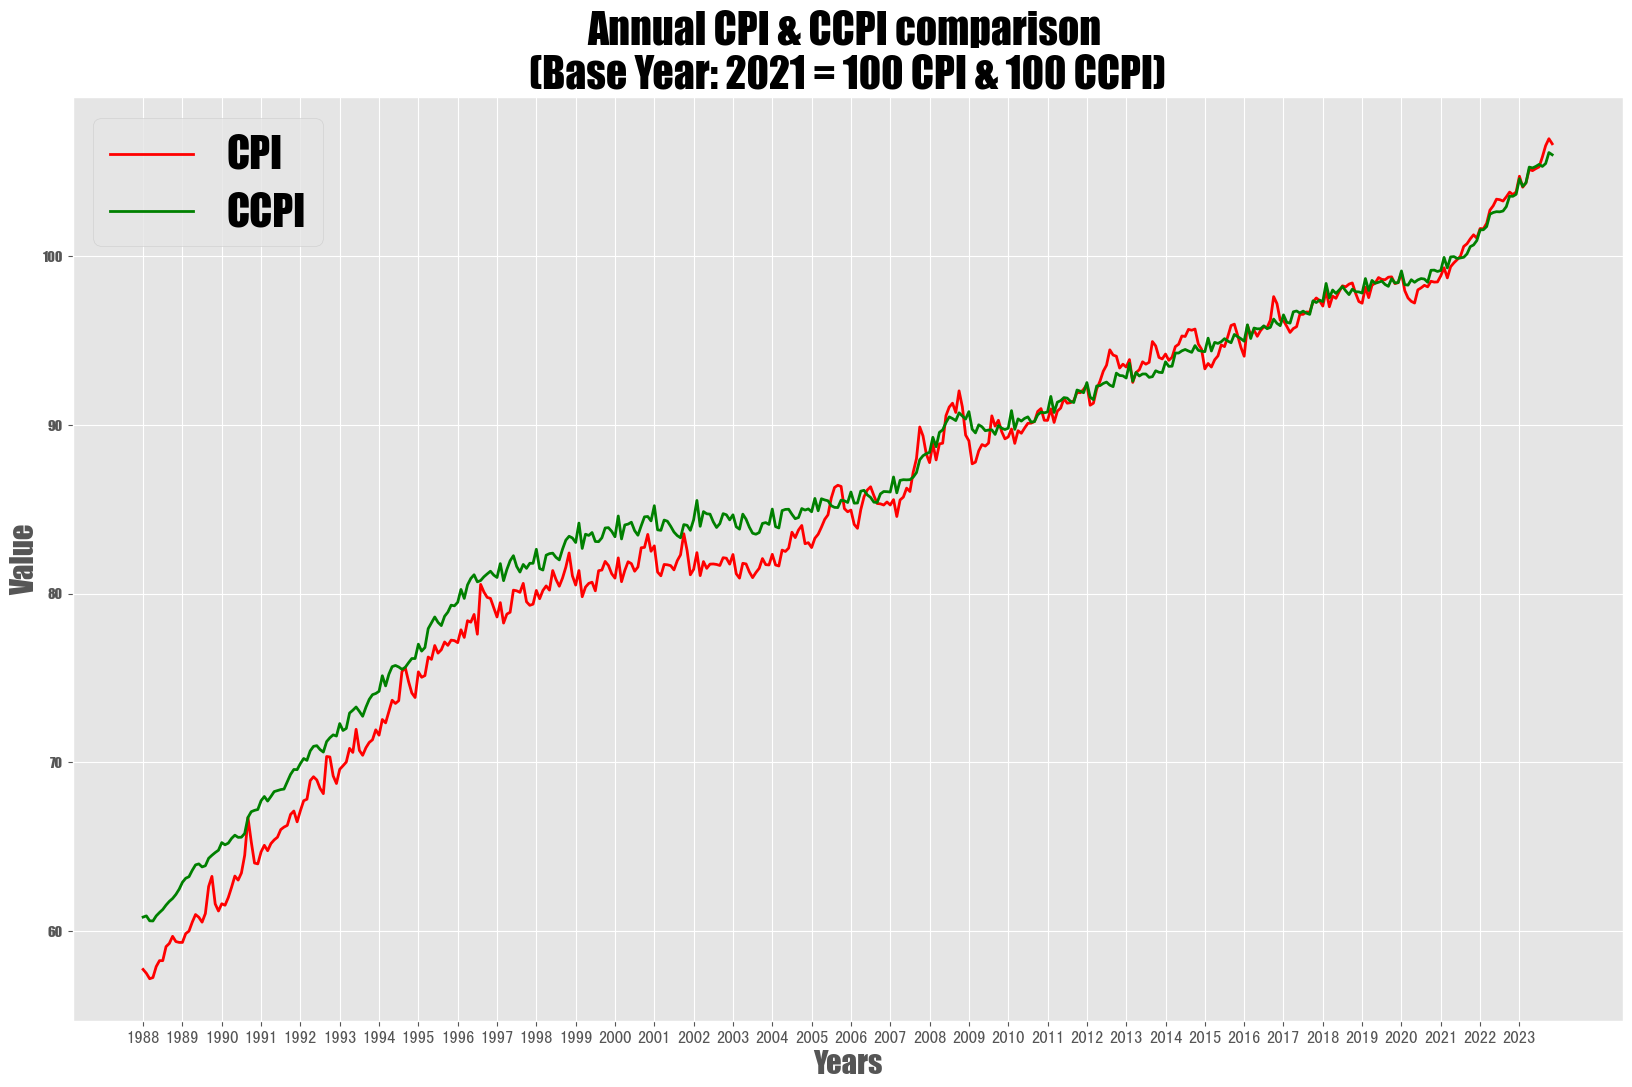

In [5]:
fig, ax = plt.subplots()

#Set custom label for x axis
values = [ n*12 for n in range(0,36)] 
test_X = [ str(year) for year in range(1988,2024) ]
plt.xticks(values,test_X,fontsize=12, fontproperties=font )

#Set title and labels 
plt.title("Annual CPI & CCPI comparison \n(Base Year: 2021 = 100 CPI & 100 CCPI)", fontsize=30)
plt.xlabel("Years", fontsize=22)
plt.ylabel("Value", fontsize=22)

#Set line skin
line_1, = ax.plot(x.values, y1.values, 'r-', label = 'CPI', lw=2.0)
line_2, = ax.plot(x.values, y2.values, 'g-', label = 'CCPI', lw=2.0)

#Set legend
plt.legend(loc='upper left', prop={'size': 30} , bbox_to_anchor=(0,1))

def animate(i):
    
    # update the data.
    line_1.set_data(x.values[:i], y1.values[:i])  
    line_2.set_data(x.values[:i], y2.values[:i])  

    return line_1, line_2

ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=500) 
    #save_count default is 100 frames; Without specifying this parameter, only first 100 rows will be draw in the animation video

ani.save("../Output/Animation/CPI_CCPI_Comparison.mp4")

plt.show()